In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.activations import relu
from keras.models import Model
from keras.layers import Reshape,Input, Lambda
from keras.utils import np_utils
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


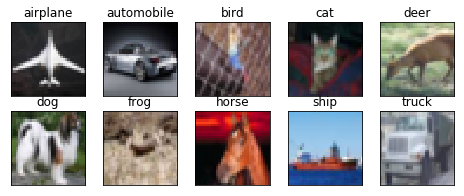

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 10s 24ms/step - loss: 1.8786 - acc: 0.2816 - val_loss: 1.5035 - val_acc: 0.4311
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3951 - acc: 0.4882 - val_loss: 1.1641 - val_acc: 0.5748
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1826 - acc: 0.5791 - val_loss: 1.0291 - val_acc: 0.6367
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0360 - acc: 0.6368 - val_loss: 0.9125 - val_acc: 0.6805
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9400 - acc: 0.6746 - val_loss: 0.8120 - val_acc: 0.7184
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8493 - acc: 0.7092 - val_loss: 0.7747 - val_acc: 0.7321
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7941 - acc: 0.7278 - val_loss: 0.7252 - val_acc: 0.7492
Epoch 8/100
390/390 [==============================] - 9s 23m

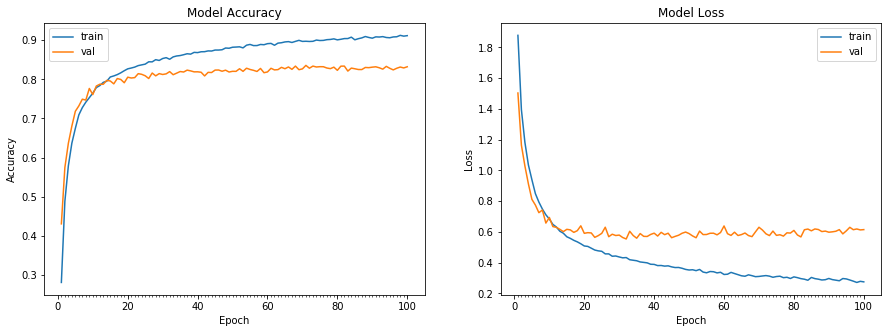

Accuracy on test data is: 83.20


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
input = Input(shape=(32, 32, 3,))

#NORMAL CONVOLUTION 
##Layer 1
layer1 = Conv2D(48, (3,3),  border_mode='same', use_bias=False)(input)
layer1 = BatchNormalization(name='norm_1')(layer1)
layer1 = relu(layer1)

# Layer 2
layer2 = Conv2D(96, (3,3), border_mode='same', use_bias=False)(layer1)
layer2 = BatchNormalization(name='norm_2')(layer2)
layer2 = relu(layer2)

##transition block
layer2_final = MaxPooling2D(pool_size=(2, 2))(layer2)
layer2_final = Conv2D(48, (1,1))(layer2_final)

##SPATIALLY SEPARABLE CONVOLUTION
#layer3
layer3 =Convolution2D(48, (3, 1),border_mode='same')(layer2_final)
layer3 = BatchNormalization(name='norm_3')(layer3)
layer3 = relu(layer3)
layer3 =Convolution2D(96, (1, 3),border_mode='same')(layer3)
layer3 = BatchNormalization(name='norm_3')(layer3)
layer3 = relu(layer3)

#layer 4
layer4 =Convolution2D(96, (3, 1),border_mode='same')(layer3)
layer4 = BatchNormalization(name='norm_3')(layer4)
layer4 = relu(layer4)
layer4 =Convolution2D(192, (1, 3),border_mode='same')(layer4)
layer4 = BatchNormalization(name='norm_3')(layer4)
layer4 = relu(layer4)

##transition block
layer4_final = MaxPooling2D(pool_size=(2, 2))(layer4)
layer4_final = Conv2D(96, (1,1))(layer4_final)

##DEPTHWISE SEPARABLE CONVOLUTION
#layer 5
layer5 = SeparableConv2D(96, 3,3, border_mode='same', depth_multiplier=1, use_bias=False)(layer4_final)
layer5 = BatchNormalization(name='norm_5')(layer5)
layer5 = relu(layer5)

#layer 6
layer6 = SeparableConv2D(192, 3,3, border_mode='same', depth_multiplier=1, use_bias=False)(layer5)
layer6 = BatchNormalization(name='norm_6')(layer6)
layer6 = relu(layer6)

##transition block
layer6_final = MaxPooling2D(pool_size=(2, 2))(layer6)
layer6_final = Conv2D(96, (1,1))(layer6_final)

##GROUPED CONVOLUTION(using 3X3 and 5X5)
#layer path_1_1
layer7=Conv2D(96, (3,3), border_mode='same', use_bias=False)(layer6_final)
layer7 = BatchNormalization(name='norm_7')(layer7)
layer7 = relu(layer7)

#layer path_1_2
layer8=Conv2D(192, (3,3), border_mode='same', use_bias=False)(layer7)
layer8 = BatchNormalization(name='norm_8')(layer8)
layer8 = relu(layer8)


#layer path_2_1
layer9=Conv2D(96, (5,5), border_mode='same', use_bias=False)(layer6_final)
layer9 = BatchNormalization(name='norm_9')(layer9)
layer9 = relu(layer9)

#layer path_2_2
layer10=Conv2D(192, (5,5), border_mode='same', use_bias=False)(layer9)
layer10 = BatchNormalization(name='norm_10')(layer10)
layer10 = relu(layer10)

#concatenating both branches of convolution
layer11 = concatenate([layer8, layer10])


##transition block
layer12_final = MaxPooling2D(pool_size=(2, 2))(layer11)
layer12_final = Conv2D(96, (1,1))(layer12_final)

##GROUPED CONVOLUTION(using 3x3 with variant dialation)

#layer path_1_1
layer13=Conv2D(96, (3,3),dilation_rate=(1, 1), border_mode='same', use_bias=False)(layer12_final)
layer13 = BatchNormalization(name='norm_13')(layer13)
layer13 = relu(layer13)

#layer path_1_2
layer14=Conv2D(192, (3,3),dilation_rate=(1, 1), border_mode='same', use_bias=False)(layer13)
layer14 = BatchNormalization(name='norm_14')(layer14)
layer14 = relu(layer14)


#layer path_2_1
layer15=Conv2D(96, (3,3),dilation_rate=(2, 2), border_mode='same', use_bias=False)(layer14)
layer15 = BatchNormalization(name='norm_15')(layer15)
layer15 = relu(layer15)

#layer path_2_2
layer16=Conv2D(192, (3,3),dilation_rate=(2, 2), border_mode='same', use_bias=False)(layer15)
layer16 = BatchNormalization(name='norm_16')(layer16)
layer16 = relu(layer16)

#concatenating both branches of convolution
layer17 = concatenate([layer14, layer16])

layer18=Conv2D(10,1)(layer17)
layer19 = Flatten()(layer18)

output = Activation('softmax')(layer19)

#print(type(input))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), use_bias=False, padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), use_bias=False, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call 

<class 'tensorflow.python.framework.ops.Tensor'>


In [0]:
model=Model(inputs=[input],outputs=[output])

AttributeError: ignored

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

mc=ModelCheckpoint("best_file.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)



datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[mc,], verbose=1)


In [0]:
end = time.time()
model.load_weights("best_file.h5")
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))